In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper

from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(f"Most recent date in the data set: {latest_date[0]}")

Most recent date in the data set: 2017-08-23


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("One Year Ago: ", one_year_ago)

One Year Ago:  2016-08-23


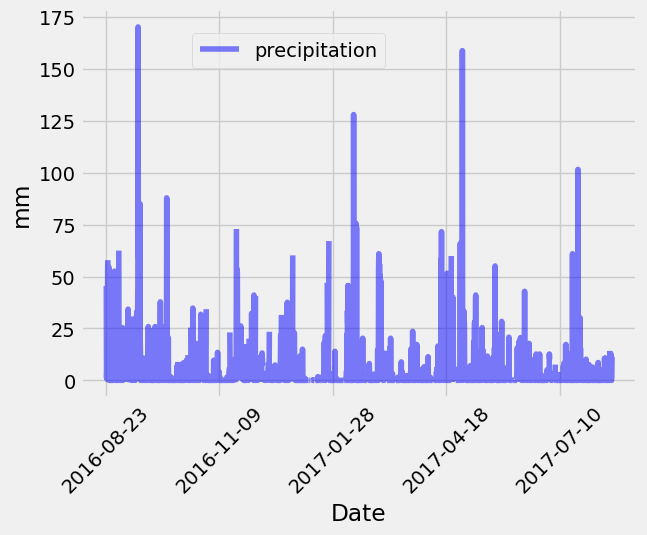

In [11]:
# Perform a query to retrieve the data and precipitation scores
yearly_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()
    
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(yearly_prcp, columns=['date', 'precipitation'])

# Sort the dataframe by date
df = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(x='date', y='precipitation', kind='line', color='blue', alpha=0.5)

# Set labels for the axes
plt.xlabel('Date')
plt.ylabel('mm')

# Set the rotation angle of the x-axis labels to 45 degrees for readability
plt.xticks(rotation=45)

# Set the legend 
ax.legend(loc=(0.2, 0.85))

# Show the plot
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
#number of stations in the Station table
no_stations = session.query(Station).count()
print(no_stations)

9


In [14]:
#number of unique stations in the Measurement table
no_stations_count = session.query(func.count(func.distinct(Measurement.station))).scalar()

# Print the count of unique station values
print(no_stations_count)

9


In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Station.station, func.count(Measurement.station)).\
    join(Measurement, Station.station == Measurement.station).\
    group_by(Station.station).\
    order_by(func.count(Measurement.station).desc()).all()

for station_id, observation_count in active_stations:
    print(f"Station ID: {station_id}, Observation Count: {observation_count}")


Station ID: USC00519281, Observation Count: 2772
Station ID: USC00519397, Observation Count: 2724
Station ID: USC00513117, Observation Count: 2709
Station ID: USC00519523, Observation Count: 2669
Station ID: USC00516128, Observation Count: 2612
Station ID: USC00514830, Observation Count: 2202
Station ID: USC00511918, Observation Count: 1979
Station ID: USC00517948, Observation Count: 1372
Station ID: USC00518838, Observation Count: 511


In [16]:
most_active = active_stations[0]
most_active_station_id = most_active[0]
print(f"The station with the greatest number of observations: {most_active_station_id}")


The station with the greatest number of observations: USC00519281


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).all()

min_temp, max_temp, avg_temp = temp_stats[0]

print(f"Min temp: {min_temp}")
print(f"Max temp: {max_temp}")
print(f"Avg temp: {avg_temp}")

Min temp: 12.2
Max temp: 29.4
Avg temp: 22.03582251082252


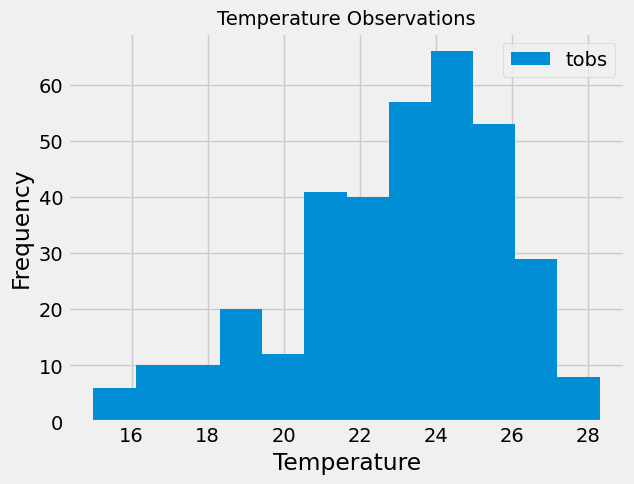

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yearly_temp_observations = session.query(Measurement.tobs).\
    filter(Measurement.date >= one_year_ago, Measurement.station == most_active_station_id).all()

# Convert the temp observations values from the yearly_tobs result into a Pandas DataFrame
df = pd.DataFrame(yearly_temp_observations, columns=['Temperature'])

# Plot the histogram using the temp data from the new DataFrame
plt.hist(df['Temperature'], bins=12)

# Customise the plot
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observations', fontsize=14)
plt.grid(True)
plt.legend(['tobs'])
plt.show() 
    

# Close Session

In [19]:
# Close Session
session.close()